In [1]:
import time
import config
import tmdbsimple as tmdb          # tmdbsimple 2.2.0
tmdb.API_KEY = config.tmdb_api_key # get TMDB API key from config.py file

import pprint as pp
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
print("Enter actor's full name...")
actor = input("... MUST be a string: ")
search = tmdb.Search()
actor_response = search.person(query=actor) 
actor_id = search.results[0]['id']
actor_id

Enter actor's full name...
... MUST be a string: Christian Bale


3894

In [3]:
actor_movie_credits = actor + " Movies"
actor_movie_credits

'Christian Bale Movies'

In [4]:
#Now get actor's credits
search_actor_id = tmdb.People(actor_id)
response_actor_id = search_actor_id.movie_credits()
response_actor_id
#actor_movie_credits = actor + " Credits")

{'cast': [{'character': 'Bruce Wayne / Batman',
   'credit_id': '52fe4230c3a36847f800ac3d',
   'release_date': '2005-06-15',
   'vote_count': 12682,
   'video': False,
   'adult': False,
   'vote_average': 7.6,
   'title': 'Batman Begins',
   'genre_ids': [28, 80, 18],
   'original_language': 'en',
   'original_title': 'Batman Begins',
   'popularity': 27.588,
   'id': 272,
   'backdrop_path': '/9myrRcegWGGp24mpVfkD4zhUfhi.jpg',
   'overview': 'Driven by tragedy, billionaire Bruce Wayne dedicates his life to uncovering and defeating the corruption that plagues his home, Gotham City.  Unable to work within the system, he instead creates a new identity, a symbol of fear for the criminal underworld - The Batman.',
   'poster_path': '/dr6x4GyyegBWtinPBzipY02J2lV.jpg'},
  {'character': 'Walter Wade, Jr.',
   'credit_id': '52fe4248c3a36847f8012183',
   'poster_path': '/bqlpFp96uWu2VDpsm4MVvLXdumh.jpg',
   'id': 479,
   'video': False,
   'vote_count': 584,
   'adult': False,
   'backdrop_pat

In [5]:
num_of_credits = len(response_actor_id['cast'][:])
num_of_credits   #how many movies

56

In [6]:
#Put all records in actor's first part of Data Frame (ie. hoffman_df)
labels = ['title','popularity','vote_average','vote_count']
idx = [film['id'] for film in response_actor_id['cast'][:]]
records = []
for film in (response_actor_id['cast'][:]):
    record = [film['title'], film['popularity'], film['vote_average'], film['vote_count']]
    records.append(record)

actor_df = pd.DataFrame.from_records(records, columns=labels, index=idx)
actor_df

,title,popularity,vote_average,vote_count
272,Batman Begins,27.588,7.6,12682
479,Shaft,11.078,5.8,584
534,Terminator Salvation,20.341,5.9,3856
1124,The Prestige,16.414,8.2,8585
1359,American Psycho,14.043,7.4,4472
1722,Captain Corelli's Mandolin,5.697,5.9,270
1808,Velvet Goldmine,6.862,7.0,223
10110,Empire of the Sun,10.231,7.5,903
10210,A Midsummer Night's Dream,7.463,6.4,198
10419,Swing Kids,6.209,6.8,112


In [7]:
#Now get 2nd part of actor's df from the tmdb.Movies for merging
labels = ['revenue','budget','profit','genres']
film_indices = [film[0] for film in actor_df.iterrows()]
#print(film_indices)
records = []
request_rate_limit = 40     #TMDB has rate limit of 40 requests per 10 seconds

for film_idx in film_indices:
    request_rate_limit -= 1
    if request_rate_limit == 0:            
        print("Hold yer horses, cowboy!")
        print("...wait per request limit...")
        time.sleep(10)
        request_rate_limit = 39
    movie = tmdb.Movies(film_idx)  #Each movie has unique identifier stored as index of df
    response = movie.info()
        
    profit = response['revenue'] - response['budget']
    record = [response['revenue'], response['budget'], profit, response['genres']]    
    records.append(record)

actor_movies_df = pd.DataFrame.from_records(records, columns=labels, index=film_indices)
actor_movies_df    

Hold yer horses, cowboy!
...wait per request limit...


,revenue,budget,profit,genres
272,374218673,150000000,224218673,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
479,107196498,46000000,61196498,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
534,371353001,200000000,171353001,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na..."
1124,109676311,40000000,69676311,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na..."
1359,34266564,7000000,27266564,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
1722,62112895,57000000,5112895,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
1808,1053788,0,1053788,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n..."
10110,66700000,35000000,31700000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
10210,0,11000000,-11000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na..."
10419,5632086,0,5632086,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n..."


In [9]:
print(actor_df.shape)
actor_df.head(5)

(56, 4)


,title,popularity,vote_average,vote_count
272,Batman Begins,27.588,7.6,12682
479,Shaft,11.078,5.8,584
534,Terminator Salvation,20.341,5.9,3856
1124,The Prestige,16.414,8.2,8585
1359,American Psycho,14.043,7.4,4472


In [10]:
print(actor_movies_df.shape)
actor_movies_df.head(5)

(56, 4)


,revenue,budget,profit,genres
272,374218673,150000000,224218673,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
479,107196498,46000000,61196498,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
534,371353001,200000000,171353001,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na..."
1124,109676311,40000000,69676311,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na..."
1359,34266564,7000000,27266564,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."


In [11]:
# This builds the full df, still need to build final
actor_full_df = pd.merge(actor_df, actor_movies_df, left_index=True, right_index=True)
print(actor_full_df.shape)
actor_full_df

(56, 8)


,title,popularity,vote_average,vote_count,revenue,budget,profit,genres
272,Batman Begins,27.588,7.6,12682,374218673,150000000,224218673,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
479,Shaft,11.078,5.8,584,107196498,46000000,61196498,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
534,Terminator Salvation,20.341,5.9,3856,371353001,200000000,171353001,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na..."
1124,The Prestige,16.414,8.2,8585,109676311,40000000,69676311,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na..."
1359,American Psycho,14.043,7.4,4472,34266564,7000000,27266564,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
1722,Captain Corelli's Mandolin,5.697,5.9,270,62112895,57000000,5112895,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
1808,Velvet Goldmine,6.862,7.0,223,1053788,0,1053788,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n..."
10110,Empire of the Sun,10.231,7.5,903,66700000,35000000,31700000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
10210,A Midsummer Night's Dream,7.463,6.4,198,0,11000000,-11000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na..."
10419,Swing Kids,6.209,6.8,112,5632086,0,5632086,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n..."


In [ ]:
#Save to PostgrSQL 

In [12]:
#Create new column containing a list of genres for each movie
def to_list(cell):
    #input is a single cell containing a list of dicts
    #rreturns a list of genres as unique strings
    l = []
    for d in cell:     #cell is list of dicts
        l.append(d['name'])
    return(l)

actor_full_df['genre_names'] = actor_full_df['genres'].map(to_list)
#Drop duplicate info
actor_full_df.drop(['genres'], axis=1, inplace=True)
actor_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
272,Batman Begins,27.588,7.6,12682,374218673,150000000,224218673,"[Action, Crime, Drama]"
479,Shaft,11.078,5.8,584,107196498,46000000,61196498,"[Action, Adventure, Crime, Thriller]"
534,Terminator Salvation,20.341,5.9,3856,371353001,200000000,171353001,"[Action, Science Fiction, Thriller]"
1124,The Prestige,16.414,8.2,8585,109676311,40000000,69676311,"[Drama, Mystery, Thriller]"
1359,American Psycho,14.043,7.4,4472,34266564,7000000,27266564,"[Thriller, Drama, Crime]"
1722,Captain Corelli's Mandolin,5.697,5.9,270,62112895,57000000,5112895,"[Drama, History, Romance]"
1808,Velvet Goldmine,6.862,7.0,223,1053788,0,1053788,"[Drama, Music]"
10110,Empire of the Sun,10.231,7.5,903,66700000,35000000,31700000,"[Drama, History, War]"
10210,A Midsummer Night's Dream,7.463,6.4,198,0,11000000,-11000000,"[Fantasy, Comedy, Romance]"
10419,Swing Kids,6.209,6.8,112,5632086,0,5632086,"[Music, Drama]"


In [13]:
print(actor_full_df.shape)
actor_full_df.describe()

(56, 8)


,popularity,vote_average,vote_count,revenue,budget,profit
count,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01,5.600000e+01
mean,9.963554,6.430357,1859.910714,8.847902e+07,3.582500e+07,5.265402e+07
std,8.131774,1.370457,3752.076202,2.094711e+08,5.775382e+07,1.660472e+08
min,0.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.750000e+08
25%,5.499250,5.975000,27.500000,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.241500,6.600000,336.000000,3.846978e+06,9.500000e+06,0.000000e+00
75%,12.841250,7.225000,2038.250000,7.304971e+07,4.825000e+07,2.342928e+07
max,38.797000,9.000000,19638.000000,1.084939e+09,2.500000e+08,8.349391e+08


Delete rows with non-movies (eg. Documentary(99), TV Movie(10770) ). Deciding what constitutes a genre.
1. Eliminate rows containing Documentery or TV Movie as a genre.
2. Eliminate rows where revenue or budget are zero.

In [14]:
actor_full_df.head(3)

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
272,Batman Begins,27.588,7.6,12682,374218673,150000000,224218673,"[Action, Crime, Drama]"
479,Shaft,11.078,5.8,584,107196498,46000000,61196498,"[Action, Adventure, Crime, Thriller]"
534,Terminator Salvation,20.341,5.9,3856,371353001,200000000,171353001,"[Action, Science Fiction, Thriller]"


In [15]:
# If Genres is in Documentary(99), TV Movie(10770), delete the row.
# If revenue, budget or profit is zero or NaN, eliminate the row.
# If vote_count	< 20, eliminate the row.
#hoffman_full_df.isnull().sum()


In [16]:
#Function removes Documentary(99) and TV Movie(10770) genres on each cell
def exclude_genres(cell):
    '''looks for excluded values in a cell
       returns boolean mask'''
    excluded_genre = ['TV Movie','Documentary']
#    print(cell)
    if len(cell) == 0:
        return False
    else:
        for g in excluded_genre:
            if g in cell:
                return False
    return True

#  .map to genres column
actor_full_df = actor_full_df[actor_full_df.genre_names.map(exclude_genres)]            
actor_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
272,Batman Begins,27.588,7.6,12682,374218673,150000000,224218673,"[Action, Crime, Drama]"
479,Shaft,11.078,5.8,584,107196498,46000000,61196498,"[Action, Adventure, Crime, Thriller]"
534,Terminator Salvation,20.341,5.9,3856,371353001,200000000,171353001,"[Action, Science Fiction, Thriller]"
1124,The Prestige,16.414,8.2,8585,109676311,40000000,69676311,"[Drama, Mystery, Thriller]"
1359,American Psycho,14.043,7.4,4472,34266564,7000000,27266564,"[Thriller, Drama, Crime]"
1722,Captain Corelli's Mandolin,5.697,5.9,270,62112895,57000000,5112895,"[Drama, History, Romance]"
1808,Velvet Goldmine,6.862,7.0,223,1053788,0,1053788,"[Drama, Music]"
10110,Empire of the Sun,10.231,7.5,903,66700000,35000000,31700000,"[Drama, History, War]"
10210,A Midsummer Night's Dream,7.463,6.4,198,0,11000000,-11000000,"[Fantasy, Comedy, Romance]"
10419,Swing Kids,6.209,6.8,112,5632086,0,5632086,"[Music, Drama]"


In [17]:
#Eliminate the rows without budget or revenue data
good_money_df = actor_full_df[(actor_full_df.budget > 0.0) & (actor_full_df.revenue > 0.0)]
pd.options.display.float_format = '{:,.2f}'.format
#good_money_df['revenue'] = good_money_df['revenue'].apply(lambda x: '{:d}'.format(x))

#good_money_df['budget'] = good_money_df['budget'].apply(lambda x: '{:,.2f}'.format(x))

#good_money_df['profit'] = good_money_df['profit'].apply(lambda x: '{:,.2f}'.format(x))
#print(good_money_df.info())
print(good_money_df.shape)
print(good_money_df.describe())
good_money_df

(28, 8)
       popularity  vote_average  vote_count          revenue         budget  \
count       28.00         28.00       28.00            28.00          28.00   
mean        14.88          6.91    3,580.32   176,567,163.39  63,507,142.86   
std          8.45          0.69    4,738.37   270,713,920.08  64,123,849.66   
min          5.53          5.80       43.00     2,300,000.00   2,000,000.00   
25%          9.60          6.50      587.00    26,214,335.50  21,500,000.00   
50%         12.61          6.90    2,161.50    76,083,201.50  43,000,000.00   
75%         16.50          7.40    4,010.00   223,371,416.75  65,000,000.00   
max         38.80          8.40   19,638.00 1,084,939,099.00 250,000,000.00   

              profit  
count          28.00  
mean  113,060,020.54  
std   217,933,412.13  
min   -25,180,886.00  
25%     1,117,578.75  
50%    24,708,373.50  
75%   129,550,026.00  
max   834,939,099.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
272,Batman Begins,27.59,7.60,12682,374218673,150000000,224218673,"[Action, Crime, Drama]"
479,Shaft,11.08,5.80,584,107196498,46000000,61196498,"[Action, Adventure, Crime, Thriller]"
534,Terminator Salvation,20.34,5.90,3856,371353001,200000000,171353001,"[Action, Science Fiction, Thriller]"
1124,The Prestige,16.41,8.20,8585,109676311,40000000,69676311,"[Drama, Mystery, Thriller]"
1359,American Psycho,14.04,7.40,4472,34266564,7000000,27266564,"[Thriller, Drama, Crime]"
1722,Captain Corelli's Mandolin,5.70,5.90,270,62112895,57000000,5112895,"[Drama, History, Romance]"
10110,Empire of the Sun,10.23,7.50,903,66700000,35000000,31700000,"[Drama, History, War]"
10530,Pocahontas,16.75,6.90,3360,346079773,55000000,291079773,"[Adventure, Animation, Family, Romance]"
3902,I'm Not There.,7.07,6.70,351,4001121,20000000,-15998879,"[Drama, Music]"
4553,The Machinist,9.31,7.50,2549,8203235,5000000,3203235,"[Thriller, Drama]"


In [18]:
print("Enter valid genre: ")
test_for_genre = input("... MUST be a capitalized: ")

def is_genre(cell):
    #returns True if in, else false (for masking)
    if test_for_genre in cell:
        return True 
    return False

tested_for_genre_df = good_money_df[good_money_df.genre_names.map(is_genre)]
not_tested_for_genre_df = good_money_df[False == good_money_df.genre_names.map(is_genre)]

print(tested_for_genre_df.shape)
print(tested_for_genre_df.describe())
tested_for_genre_df.head(3)

Enter valid genre: 
... MUST be a capitalized: Drama
(22, 8)
       popularity  vote_average  vote_count          revenue         budget  \
count       22.00         22.00       22.00            22.00          22.00   
mean        14.86          7.04    3,944.95   180,078,420.68  61,009,090.91   
std          9.44          0.67    5,276.20   297,400,120.02  65,427,691.16   
min          5.53          5.80       43.00     2,300,000.00   2,000,000.00   
25%          9.30          6.60      573.75    19,004,778.50  20,500,000.00   
50%         11.05          7.00    1,949.00    66,483,200.50  37,500,000.00   
75%         15.82          7.47    4,564.25   193,915,091.50  75,000,000.00   
max         38.80          8.40   19,638.00 1,084,939,099.00 250,000,000.00   

              profit  
count          22.00  
mean  119,069,329.77  
std   240,000,623.78  
min   -25,180,886.00  
25%       729,868.25  
50%    16,766,482.50  
75%   122,360,497.50  
max   834,939,099.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
272,Batman Begins,27.59,7.60,12682,374218673,150000000,224218673,"[Action, Crime, Drama]"
1124,The Prestige,16.41,8.20,8585,109676311,40000000,69676311,"[Drama, Mystery, Thriller]"
1359,American Psycho,14.04,7.40,4472,34266564,7000000,27266564,"[Thriller, Drama, Crime]"


In [19]:
#Not in genre info
print(not_tested_for_genre_df.shape)
print(not_tested_for_genre_df.describe())
not_tested_for_genre_df.head(3)  

(6, 8)
       popularity  vote_average  vote_count        revenue         budget  \
count        6.00          6.00        6.00           6.00           6.00   
mean        14.95          6.45    2,243.33 163,692,553.33  72,666,666.67   
std          3.31          0.61    1,261.28 154,966,762.33  64,005,208.12   
min         11.08          5.80      584.00   5,359,645.00  20,000,000.00   
25%         12.81          5.93    1,360.75  73,049,710.75  48,250,000.00   
50%         14.50          6.45    2,242.00  94,673,340.50  55,000,000.00   
75%         16.39          6.97    3,162.25 286,358,954.25  58,750,000.00   
max         20.34          7.10    3,856.00 371,353,001.00 200,000,000.00   

              profit  
count           6.00  
mean   91,025,886.67  
std   117,516,366.33  
min   -14,640,355.00  
25%    16,799,710.75  
50%    41,673,340.50  
75%   143,813,875.25  
max   291,079,773.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
479,Shaft,11.08,5.80,584,107196498,46000000,61196498,"[Action, Adventure, Crime, Thriller]"
534,Terminator Salvation,20.34,5.90,3856,371353001,200000000,171353001,"[Action, Science Fiction, Thriller]"
10530,Pocahontas,16.75,6.90,3360,346079773,55000000,291079773,"[Adventure, Animation, Family, Romance]"


In [20]:
len(tested_for_genre_df['popularity'])

22

[Text(0, 0, 'Drama'), Text(0, 0, 'Not Drama')]

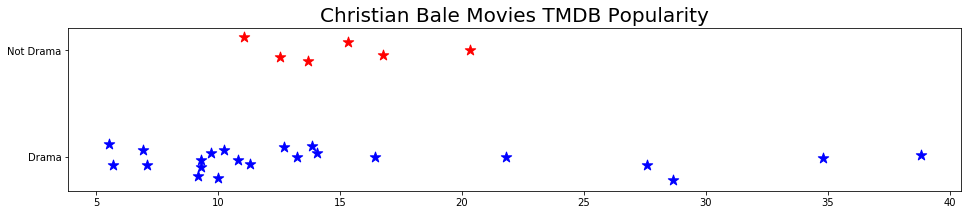

In [21]:
#Plot the distribution for popularity

fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(tested_for_genre_df['popularity'], np.repeat(0, len(tested_for_genre_df['popularity'])) + np.random.normal(0, 0.1, len(tested_for_genre_df['popularity'])), marker="*", c='blue', s=120)
ax.scatter(not_tested_for_genre_df['popularity'], np.repeat(1, len(not_tested_for_genre_df['popularity'])) + np.random.normal(0, 0.1, len(not_tested_for_genre_df['popularity'])),marker="*", c='red', s=120)
plt.title(actor + ' Movies TMDB Popularity', size = 20)
ax.set_yticks([0, 1])

ax.set_yticklabels([test_for_genre, "Not " + test_for_genre])  #generalize the label for and genre
#plt.tight_layout()

Null Hypothesis: H0 - There is no difference in the popularity of Hoffman's movies in drama vs. non-dramatic categories.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test

In [ ]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_genre_wins = count_winning_pairs(not_tested_for_genre_df['popularity'], tested_for_genre_df['popularity'])
genre_wins = count_winning_pairs(tested_for_genre_df['popularity'], not_tested_for_genre_df['popularity'])
print("Total Number of Comparisons: {}\n".format(len(not_tested_for_genre_df['profit'])*len(tested_for_genre_df['profit'])))
print("Number of 'Not-in-Genre' Movie Wins: {}\n".format(not_genre_wins))
print("Number of In Genre: " + test_for_genre + " Movie Wins: {}".format(genre_wins))

The total number of wins is the total number of comparisons between a popularity of an "in genre" movie and the popularity of a not-in-genre movie.

In [ ]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_tested_for_genre_df['popularity'], tested_for_genre_df['popularity'], alternative="greater")
print("p-value for 'Not-in-Genre' Movie Popularity > " + test_for_genre + " Movie Popularity: {:2.3f}".format(res.pvalue))

*********************************

Clearly, Non Dramatic Hoffman movies are more popular than his Dramatic movies, 
at least in the measure of popularity in the TMDB.

*****Note that this conclusion will change for each actor and each genre tested!!!!

In [ ]:
#Plot the distribution for profit
fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(tested_for_genre_df['revenue'], np.repeat(0, len(tested_for_genre_df['revenue'])) + np.random.normal(0, 0.1, len(tested_for_genre_df['revenue'])), marker='$''\$''$', c='yellow', edgecolors='green', s=330)
ax.scatter(not_tested_for_genre_df['revenue'], np.repeat(1, len(not_tested_for_genre_df['revenue'])) + np.random.normal(0, 0.1, len(not_tested_for_genre_df['revenue'])),marker='$''\$''$',c='blue', edgecolors='green', s=330)
plt.title(actor + ' Movies - Revenue', size=20)


def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(value / 1000000))
    if N == 0:
        return "0"
    elif N == 100:
        return ("$100")
    elif N == 200:
        return ("$200")
    elif N == 300:
        return ("$300")
    elif N == 400:
        return ("$400")
    elif N == 500:
        return ("$500")
    elif N == 600:
        return ("$600")
    elif N == 700:
        return ("$700")
    else:
        return ("$800")

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.set_xlabel('Millions of U.S. Dollars', backgroundcolor='white', color=(.3, .9, .01), animated=True, fontstyle='italic', size=13)
ax.set_yticks([0, 1])
_nothing = ax.set_yticklabels([test_for_genre + "  ", "Not " + test_for_genre], fontstyle='oblique', color=(.18, .31, .31), size='15')
#plt.tight_layout()

******
Null Hypothesis: H0 - There is no difference in the revenue of Hoffman's movies in drama vs. non-dramatic categories.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test
*******Note that this will change for each actor and genre tested.

In [ ]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_genre_wins = count_winning_pairs(not_tested_for_genre_df['revenue'], tested_for_genre_df['revenue'])
genre_wins = count_winning_pairs(tested_for_genre_df['revenue'], not_tested_for_genre_df['revenue'])
print("Total Number of Comparisons: {}\n".format(len(not_tested_for_genre_df['revenue'])*len(tested_for_genre_df['revenue'])))
print("Number of 'Not-in-Genre' Movie Wins: {}\n".format(not_genre_wins))
print("Number of In Genre: " + test_for_genre + " Movie Wins: {}".format(genre_wins))

Remember, the total number of "wins" is the total number of comparisons between the revenue of a in-genre movie and the revenue of a not-in-genre movie.

In [ ]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_tested_for_genre_df['revenue'], tested_for_genre_df['revenue'], alternative="greater")

print("p-value for 'Not-in-Genre' Movie Popularity > " + test_for_genre + " Movie Popularity: {:2.3f}".format(res.pvalue))

******
Clearly, Non Dramatic Hoffman movies are make more money than his Dramatic movies.
*****Note that this conclusion willchange for each actor & genre tested.